## Decision Tree (for discrete target)
split the data based on a metric such as entropy or Gini impurity.
* Impurity - degree of randomness or uncertainty in a set of examples. Gini index, Entropy
* Information gain - Information gain is a measure of the reduction in impurity achieved by splitting a dataset at that feature. Used to decide spliting feature.
* Reduction in variance - For continuous target variable. (SPLIT WITH LOWER VARIANCE)

Advantages:
* Ability to handle imbalanced data
* Less computation
* Can handle continuous and categorical data
* Mention feature importance clearily
* Missing value tolerance

Disadvantages:
* lots of layer. More complex.
* Can have overfitting so we use random forest
* For more classes, complexity increases.


### CART
CART (Classification and Regression Tree) uses the Gini method to create binary splits.
* Add pruning and limit of tree size to avoid overfitting.
* Minimum samples for a node split.
* Maximum number of leaf nodes
* Maximun depth of the tree
* Minimum samples for a leaf node.
* Maximum features to consider for a split (sqr root of no of featuires)


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

In [89]:
from sklearn.datasets import make_classification
# 2 classes
X, y = make_classification(n_features=8, n_classes=4, n_clusters_per_class=1)
print(X.shape, y.shape)

(100, 8) (100,)


In [90]:
from sklearn.model_selection import train_test_split 

X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 8), (20, 8), (80,), (20,))

In [91]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="gini",  # Gini, entropy, log_loss
                                    splitter="best", # best, random
                                    max_depth=None,
                                    min_samples_split=5,
                                    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
                                    min_weight_fraction_leaf=0.0, 
                                    max_features=None, # "sqrt, log2, auto"
                                    random_state=None, 
                                    max_leaf_nodes=None, # no of leaves 
                                    min_impurity_decrease=0.0, # the imurity needs to reduce for the split to be selected
                                    class_weight=None,
                                    ccp_alpha=0.0, 
                                    monotonic_cst=None)

In [93]:
tree_clf.fit(X_train, y_train)
prediction = tree_clf.predict(X_test)
prediction

array([1, 3, 2, 3, 2, 0, 2, 1, 1, 3, 0, 3, 3, 1, 0, 0, 0, 0, 2, 0])

In [65]:
tree_clf.feature_importances_

array([0.02766969, 0.06250386, 0.0693082 , 0.02972845, 0.28713526,
       0.46683284, 0.02223457, 0.03458712])

In [66]:
tree_clf.predict_proba(X_test[:2])

array([[1., 0., 0., 0.],
       [0., 0., 0., 1.]])

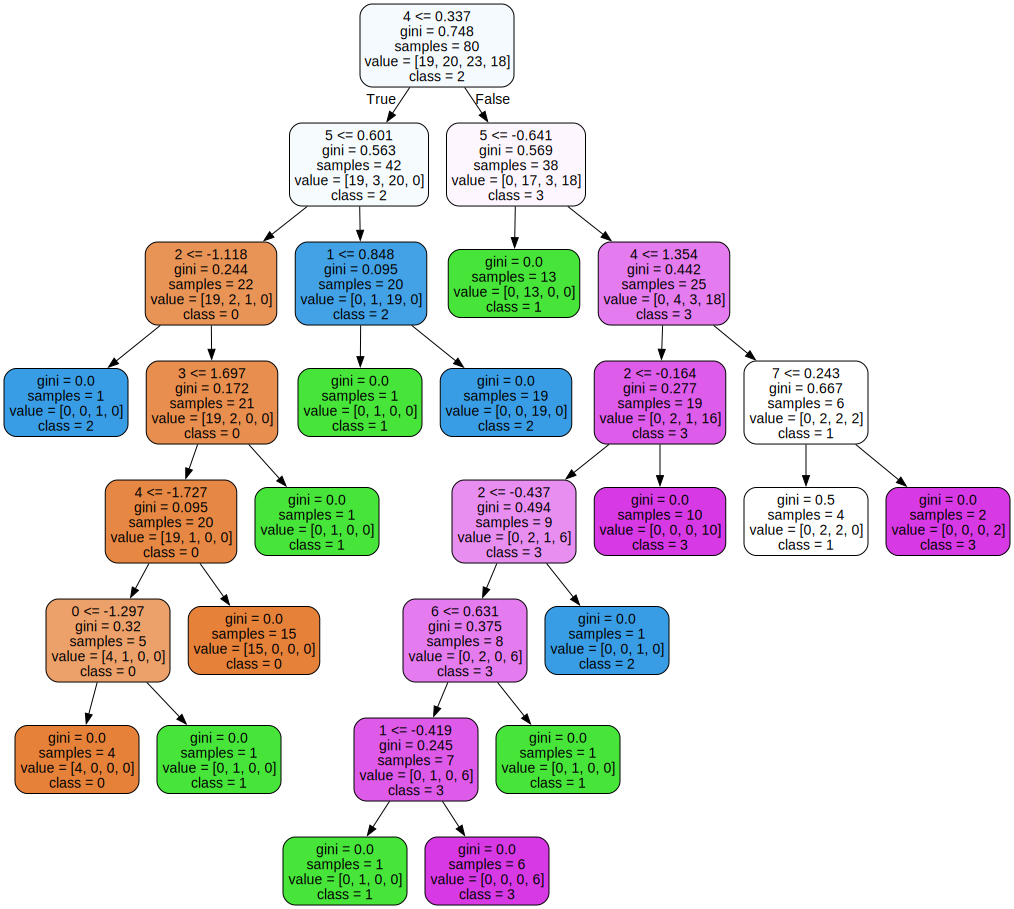

In [71]:
plot_tree(tree_clf)
with open("iris_tree.dot") as f:
        dot_graph = f.read()
        
Source(dot_graph)

In [68]:
from sklearn.tree import export_graphviz
from graphviz import Source

def plot_tree(tree_clf):
    export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=["0","1","2","3","4","5","6","7"],
        class_names=["0","1","2","3"],
        rounded=True,
        filled=True
    )
    
    with open("iris_tree.dot") as f:
        dot_graph = f.read()
        
    Source(dot_graph)

In [74]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier(criterion="entropy",  # Gini, entropy, log_loss
                                    splitter="best", # best, random
                                    max_depth=None,
                                    min_samples_split=5,
                                    min_samples_leaf=1, # The minimum number of samples required to be at a leaf node.
                                    min_weight_fraction_leaf=0.0, 
                                    max_features=None, # "sqrt, log2, auto"
                                    random_state=None, 
                                    max_leaf_nodes=None, # no of leaves 
                                    min_impurity_decrease=0.0, # the imurity needs to reduce for the split to be selected
                                    class_weight=None,
                                    ccp_alpha=0.0, 
                                    monotonic_cst=None)

tree_clf.fit(X_train, y_train)
prediction=tree_clf.predict(X_test)

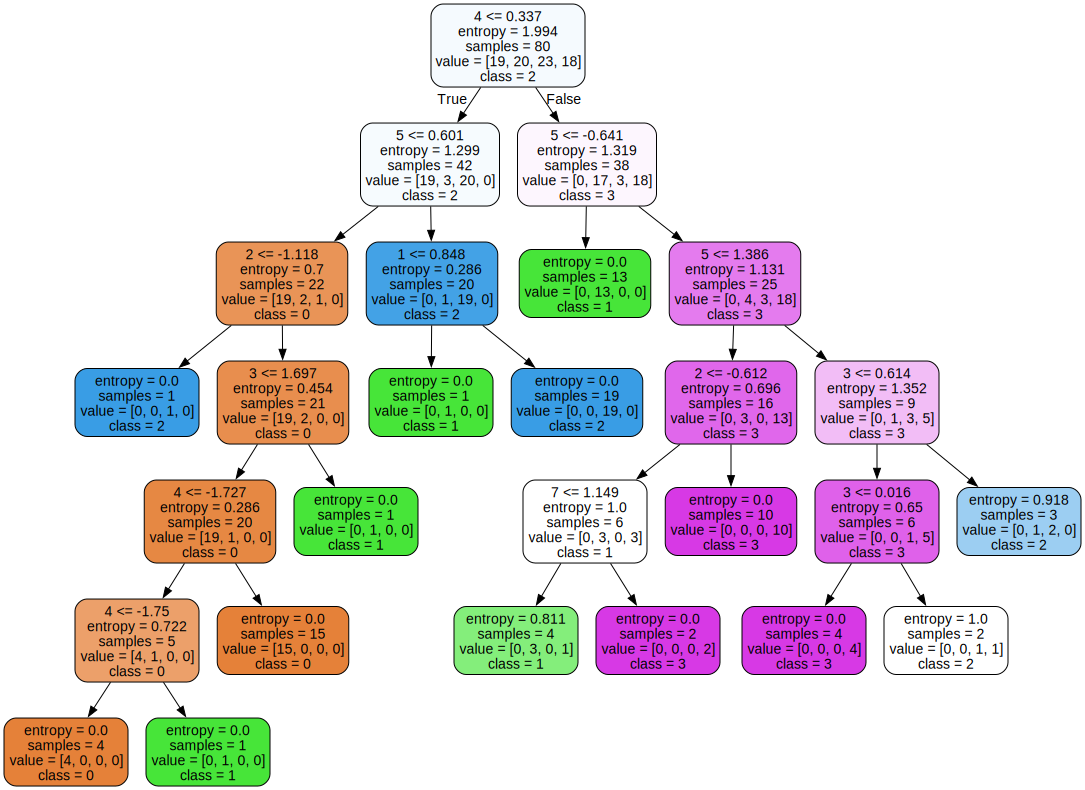

In [75]:
plot_tree(tree_clf)
with open("iris_tree.dot") as f:
        dot_graph = f.read()
        
Source(dot_graph)

### DecisionRegressor

In [76]:
from sklearn.datasets import make_regression
# 2 classes
X, y = make_regression(n_samples=100,
    n_features=10,
    n_informative=5,
    n_targets=1,
    bias=0.0,
    effective_rank=None,
    tail_strength=0.5,
    noise=0.0,
    shuffle=True,
    coef=False,
    random_state=None)
print(X.shape, y.shape)

(100, 10) (100,)


In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y , test_size=0.2, random_state=42) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 10), (20, 10), (80,), (20,))

In [83]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(criterion="squared_error", # {"squared_error", "friedman_mse", "absolute_error", "poisson"}
                                splitter="best",
                                max_depth=None,
                                min_samples_split=2,
                                min_samples_leaf=1,
                                min_weight_fraction_leaf=0.0,
                                max_features=None,
                                random_state=None,
                                max_leaf_nodes=None,
                                min_impurity_decrease=0.0,
                                ccp_alpha=0.0,
                                monotonic_cst=None)

tree_reg.fit(X_train, y_train)
prediction=tree_reg.predict(X_test)

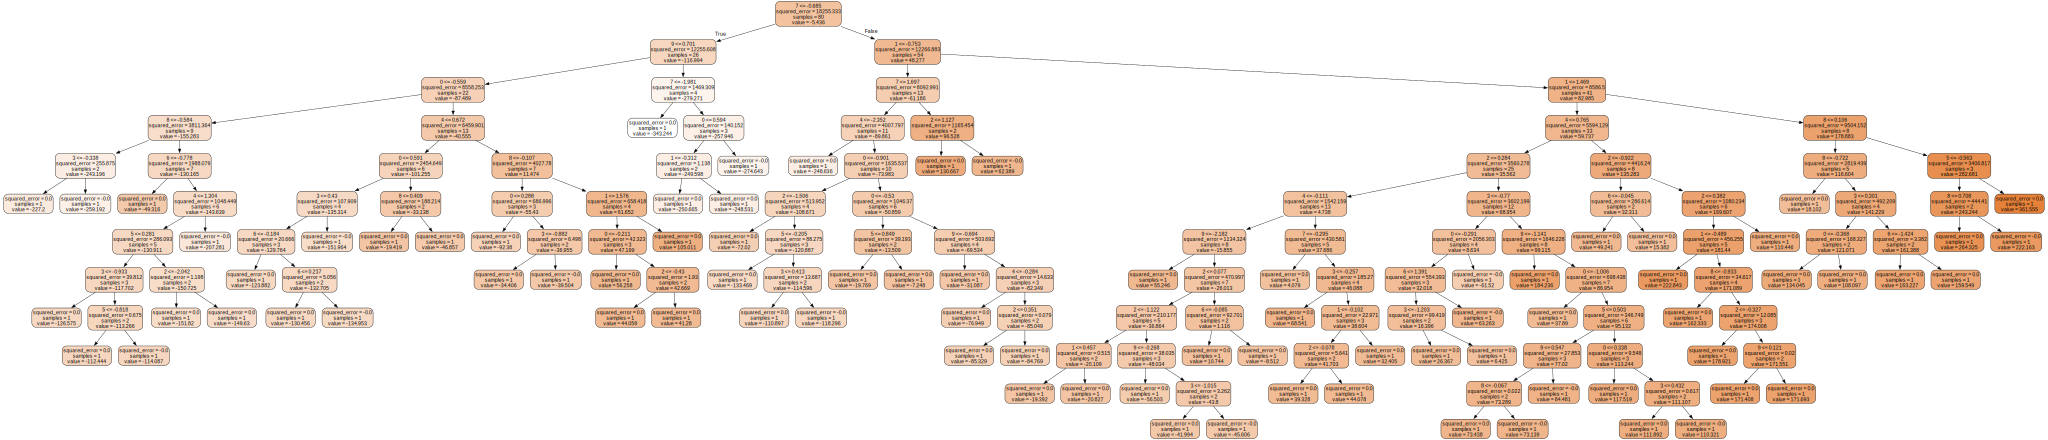

In [84]:
export_graphviz(
        tree_reg,
        out_file="iris_tree.dot",
        feature_names=["0","1","2","3","4","5","6","7","8","9"],
        class_names=["0"],
        rounded=True,
        filled=True
    )
    
with open("iris_tree.dot") as f:
        dot_graph = f.read()
        
Source(dot_graph)

In [99]:
accuracy = np.sum(y_test == prediction) / len(y_test)
accuracy

0.85